# HR Demo

In [1]:
# Read HR_dataset.csv into data_set variable
data_set<-read.csv('HR_dataset.csv')

# Exploratory Data Analysis

The very first step in every data analytics tasks. To gain an overall understanding of the dataset, the range and types of the data, and also the shape of the dataset.

In [2]:
# Take a quick look at the top rows of the dataset using `head` command
head(data_set)

names,satisfaction_level,last_evaluation,number_project,average_montly_hours,exp_in_company,Work_accident,left,promotion_last_5years,role,salary
Jessica Stroud,0.38,0.53,2,157,3,0,1,0,sales,low
Daryl Fields,0.80,0.86,5,262,6,0,1,0,sales,medium
Daisy Anderson,0.11,0.88,7,272,4,0,1,0,sales,medium
Joseph Fernandez,0.72,0.87,5,223,5,0,1,0,sales,low
Herbert Moore,0.37,0.52,2,159,3,0,1,0,sales,low
Daniel Belew,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
# dim stands for dimension. We use dim command to check the shape of our dataset
dim(data_set)

[1] 15000    11

In [4]:
# str stands for structure. We use str command to check the structure of our dataset.
str(data_set)


'data.frame':	15000 obs. of  11 variables:
 $ names                : Factor w/ 14746 levels "Aaron Beal","Aaron Cano",..: 6649 2975 2785 7269 5515 2838 12962 8651 8121 5051 ...
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int  2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int  157 262 272 223 159 153 247 259 224 142 ...
 $ exp_in_company       : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ left                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: int  0 0 0 0 0 0 0 0 0 0 ...
 $ role                 : Factor w/ 10 levels "accounting","hr",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salary               : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...


In [5]:
# Another cool feature of R we can use is call the summary function. It gives a quick summary of all the variables.
summary(data_set)

            names       satisfaction_level last_evaluation  number_project 
 James Brown   :    7   Min.   :0.0900     Min.   :0.3600   Min.   :2.000  
 Robert Smith  :    5   1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000  
 David Brown   :    4   Median :0.6400     Median :0.7200   Median :4.000  
 David Williams:    4   Mean   :0.6128     Mean   :0.7161   Mean   :3.803  
 James Johnson :    4   3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000  
 James Wilson  :    4   Max.   :1.0000     Max.   :1.0000   Max.   :7.000  
 (Other)       :14972                                                      
 average_montly_hours exp_in_company   Work_accident         left       
 Min.   : 96.0        Min.   : 2.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:156.0        1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :200.0        Median : 3.000   Median :0.0000   Median :0.0000  
 Mean   :201.1        Mean   : 3.498   Mean   :0.1446   Mean   :0.2381  
 3rd Qu.:245.0        3rd Q

From the summary above. We learn that about 23.81% of staff have left, and the number of staff in each department.

In [6]:
# Next we want to perform some grouping to see the differences between the group of staff who left and the group of staff who stayed.
# We may use the aggregate function to perform the grouping.

aggregate(data_set[,c("satisfaction_level","last_evaluation","number_project","average_montly_hours","exp_in_company","Work_accident",
                      "promotion_last_5years")], by=list(left=data_set$left), FUN=mean)

left,satisfaction_level,last_evaluation,number_project,average_montly_hours,exp_in_company,Work_accident,promotion_last_5years
0,0.6668096,0.7154734,3.786664,199.0602,3.380032,0.17500875,0.026251313
1,0.4402044,0.7181663,3.855823,207.4261,3.876820,0.04731243,0.005319149


So now we have to think of the following:

- What features affect our target variable the most (turnover)?
- What features have strong correlations with each other?


In [7]:
#Correlation Matrix
library(reshape2)
library(ggplot2)
cor_vars<-data_set[,c("satisfaction_level","last_evaluation","number_project","average_montly_hours","exp_in_company","Work_accident","left","promotion_last_5years")]
cor(cor_vars)
trans<-cor(cor_vars)
melted_cormat <- melt(trans)



,satisfaction_level,last_evaluation,number_project,average_montly_hours,exp_in_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00000000,0.105077216,-0.142907840,-0.020012968,-0.100803049,0.058672712,-0.388225211,0.025596386
last_evaluation,0.10507722,1.000000000,0.349380001,0.339769718,0.131658125,-0.007134995,0.006701221,-0.008694522
number_project,-0.14290784,0.349380001,1.000000000,0.417232298,0.196839351,-0.004766990,0.023899700,-0.006073306
average_montly_hours,-0.02001297,0.339769718,0.417232298,1.000000000,0.127791262,-0.010159688,0.071352563,-0.003550457
exp_in_company,-0.10080305,0.131658125,0.196839351,0.127791262,1.000000000,0.002092139,0.144924271,0.067420391
Work_accident,0.05867271,-0.007134995,-0.004766990,-0.010159688,0.002092139,1.000000000,-0.154653302,0.039249226
left,-0.38822521,0.006701221,0.023899700,0.071352563,0.144924271,-0.154653302,1.000000000,-0.061799050
promotion_last_5years,0.02559639,-0.008694522,-0.006073306,-0.003550457,0.067420391,0.039249226,-0.061799050,1.000000000


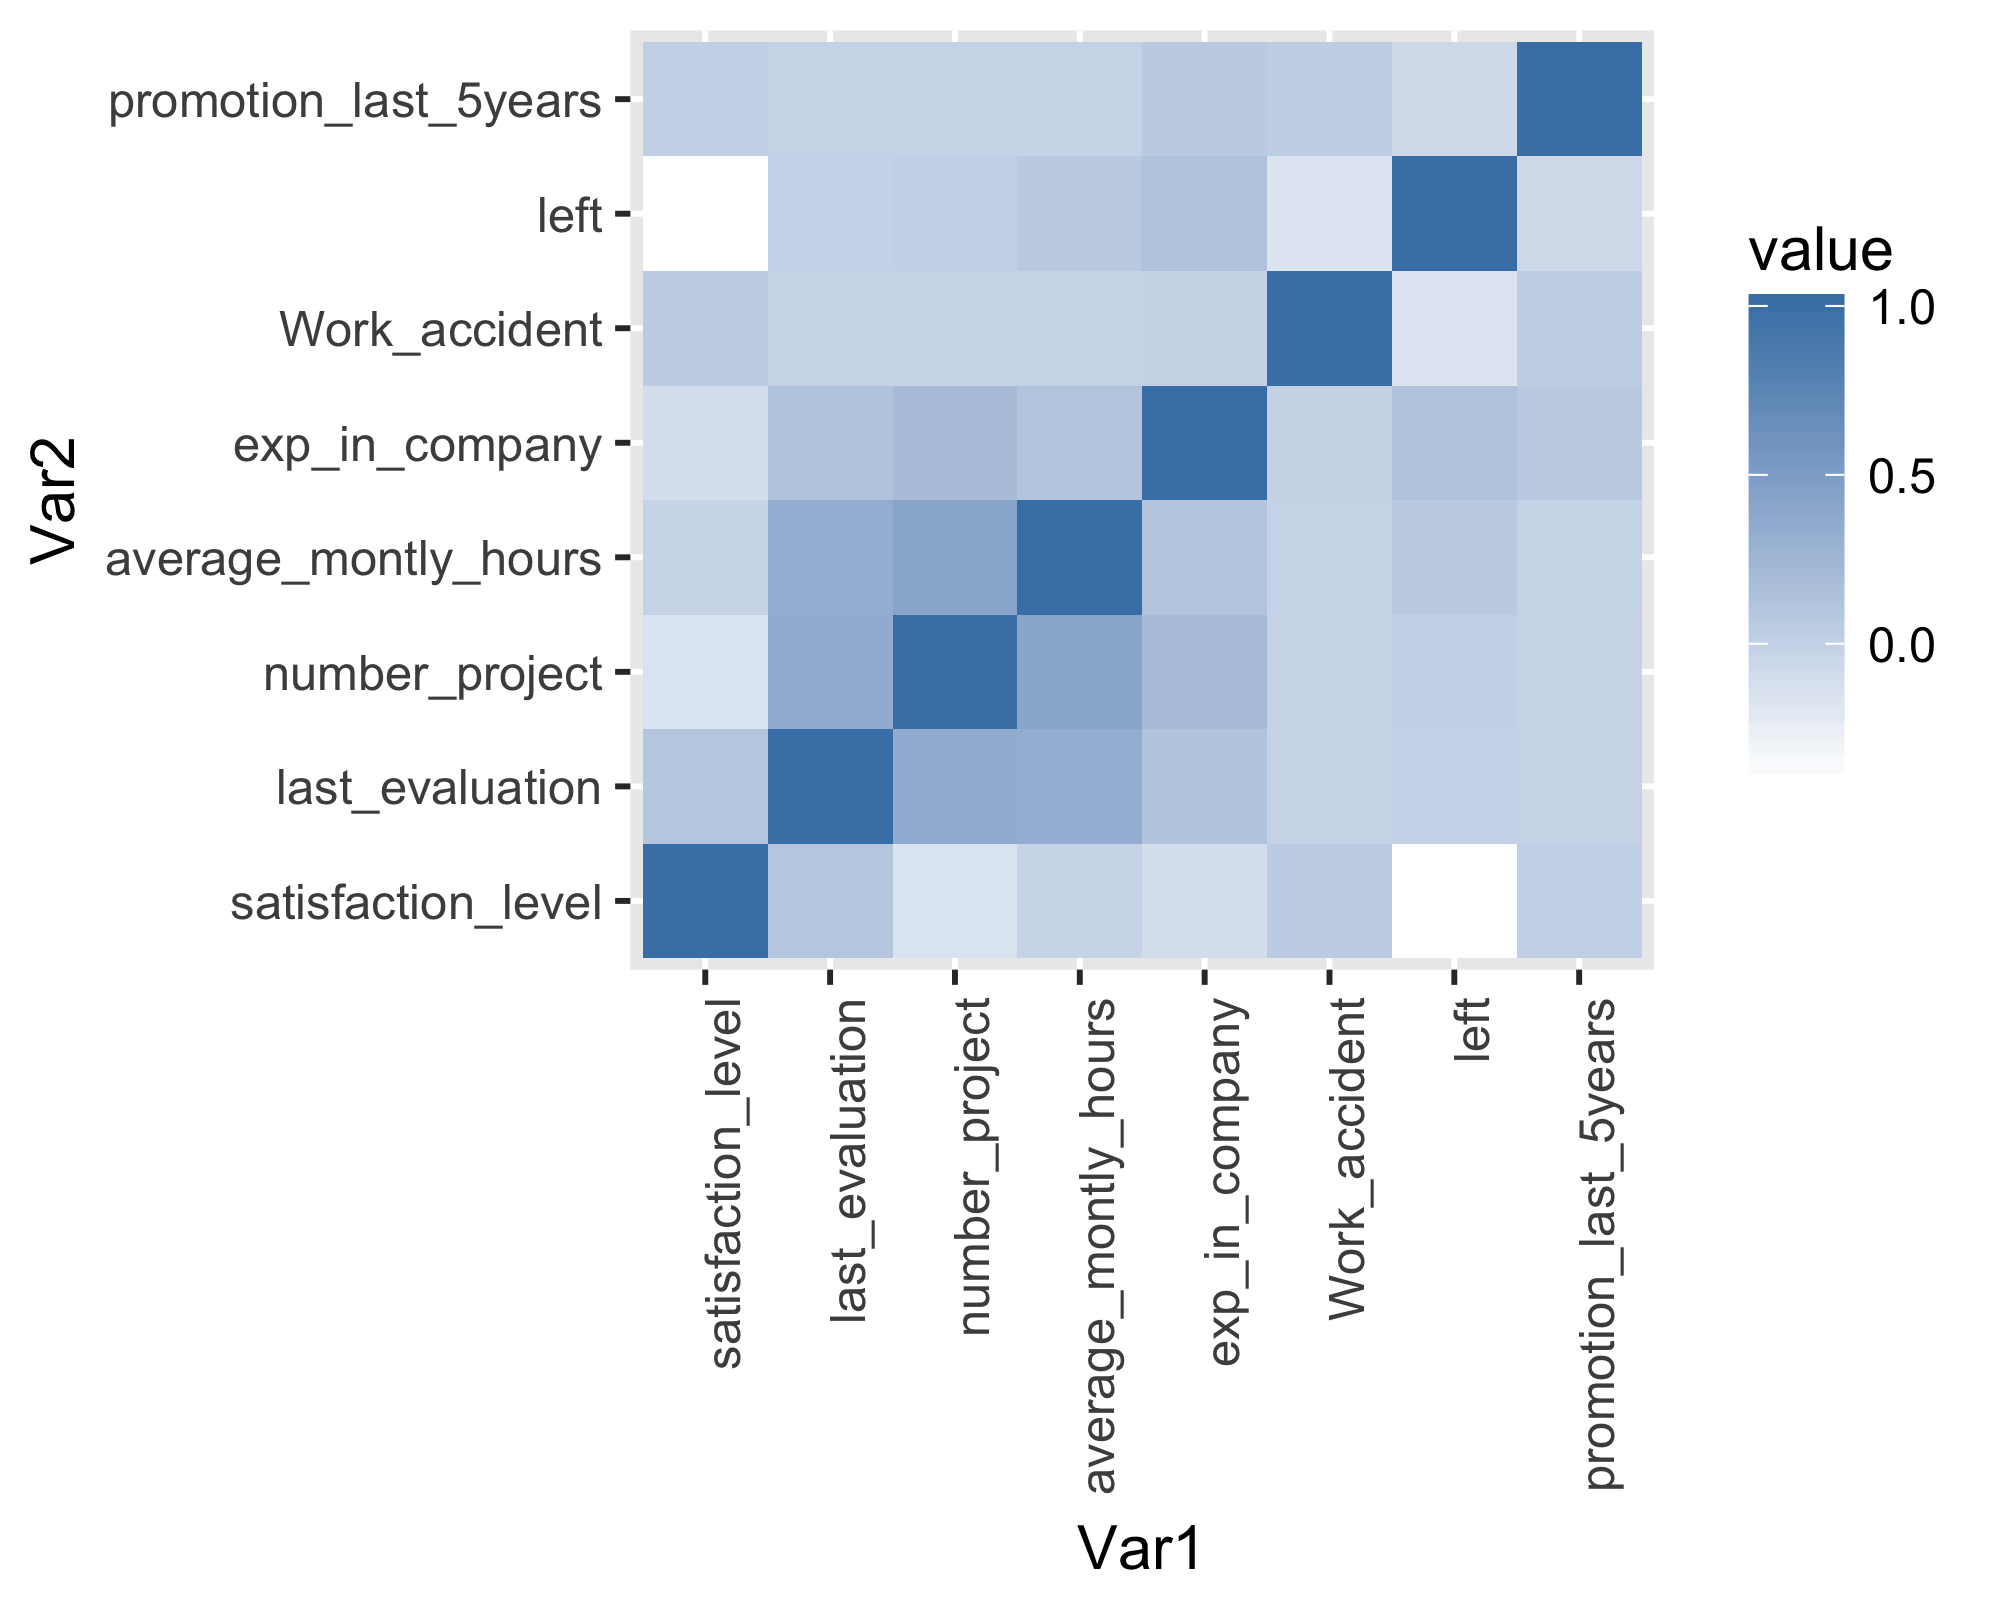

In [78]:
# Use this line if you are using a retina display
options(repr.plot.width=5, repr.plot.height=4, repr.plot.res = 400)



ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() +theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_fill_gradient(low = "white", high = "steelblue")

**Summary:**

From the heatmap, there is a positive(+) correlation between `projectCount`, `averageMonthlyHours`, and `evaluation`. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

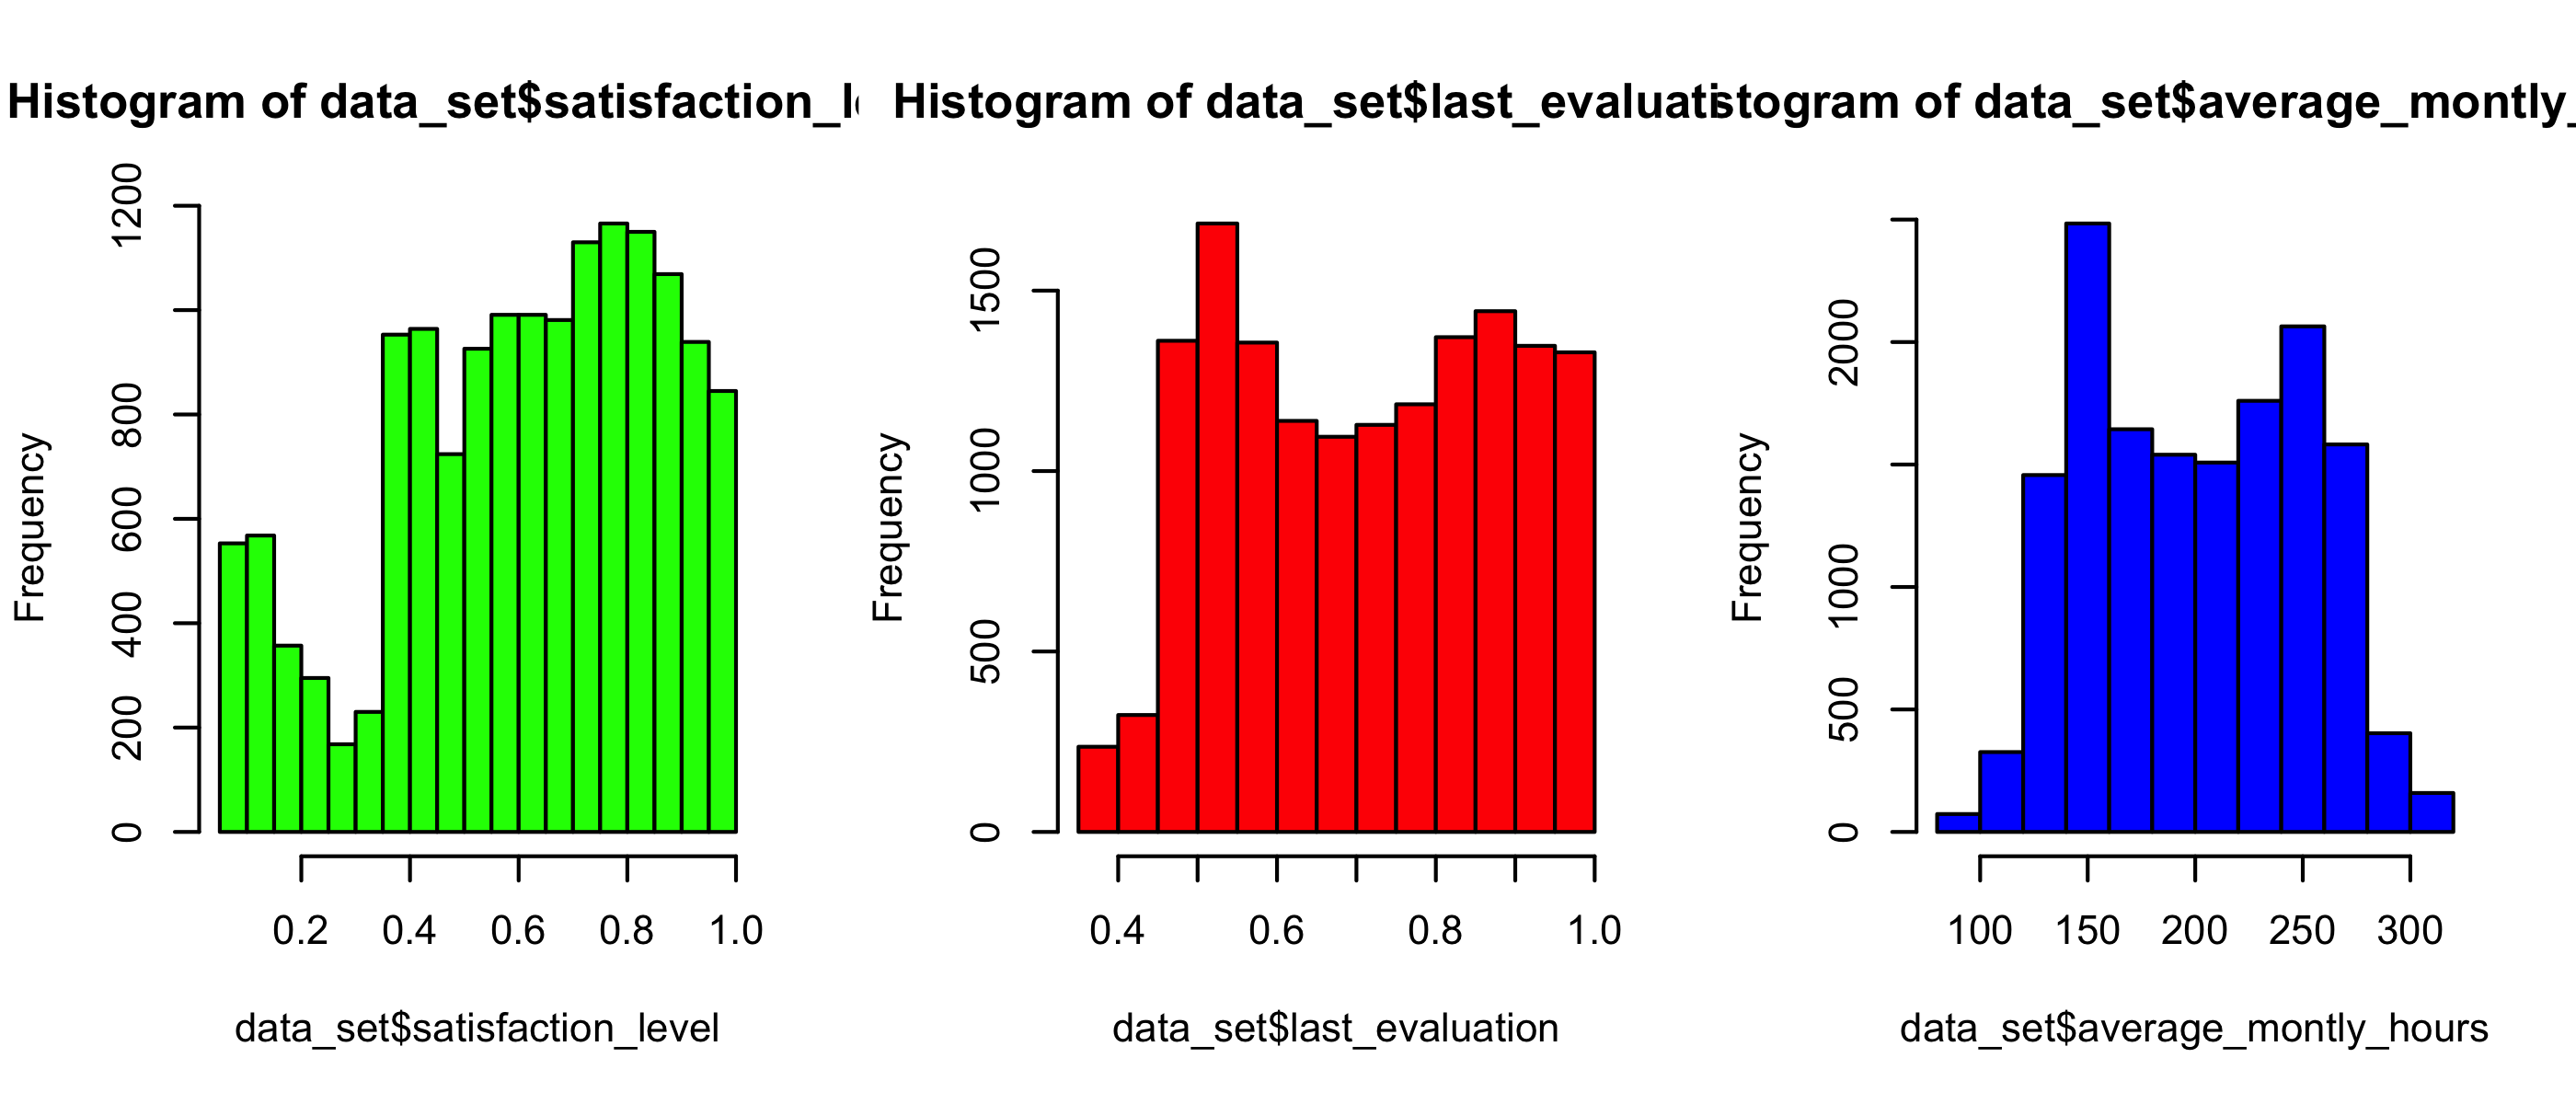

In [55]:
# Let's utilize the histogram to visualize the distribution
options(repr.plot.width=7)

par(mfrow=c(1,3)) #To set the layout of our chart
hist(data_set$satisfaction_level, col="green")
hist(data_set$last_evaluation, col="red")
hist(data_set$average_montly_hours, col="blue")

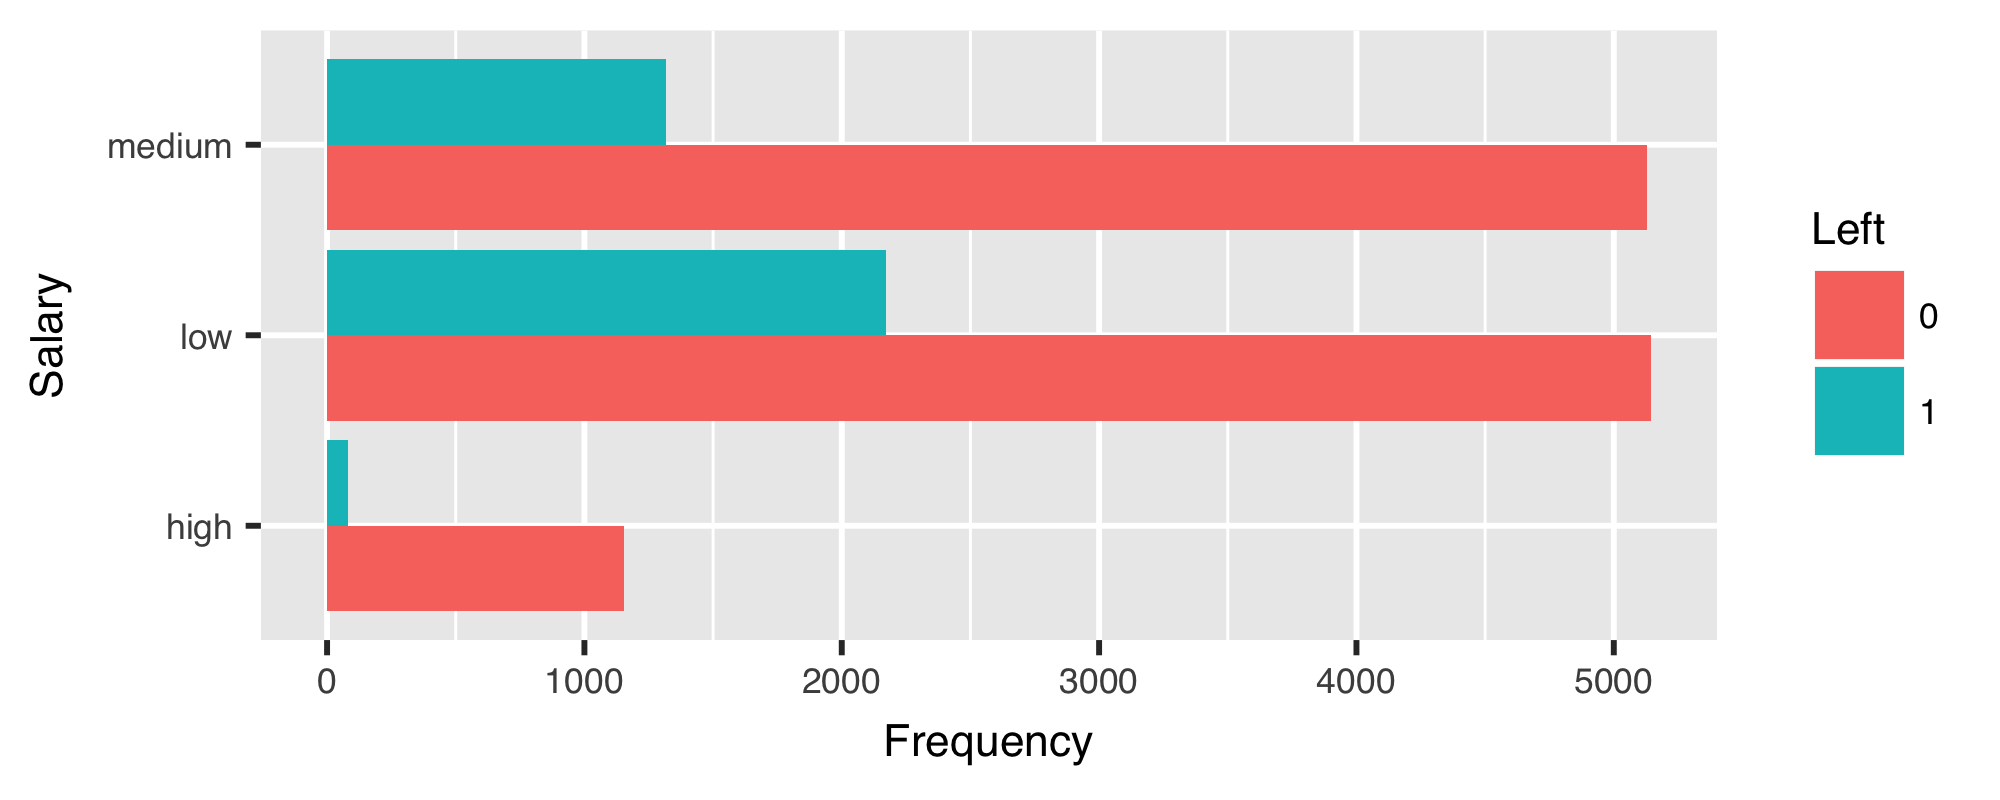

In [106]:
options(repr.plot.height=2)

vis_1<-table(data_set$salary,data_set$left)
d_vis_1<-as.data.frame(vis_1)

ggplot(d_vis_1, aes(x=Var1,y=Freq,fill=Var2)) +
 geom_bar(position="dodge",stat='identity') + coord_flip() + 
 xlab('Salary') + ylab('Frequency') +labs(fill="Left") + 
 theme(text=element_text(size=8,  family="sans"))

# Staff with high salary hardly left, and staff with low salary mostly left

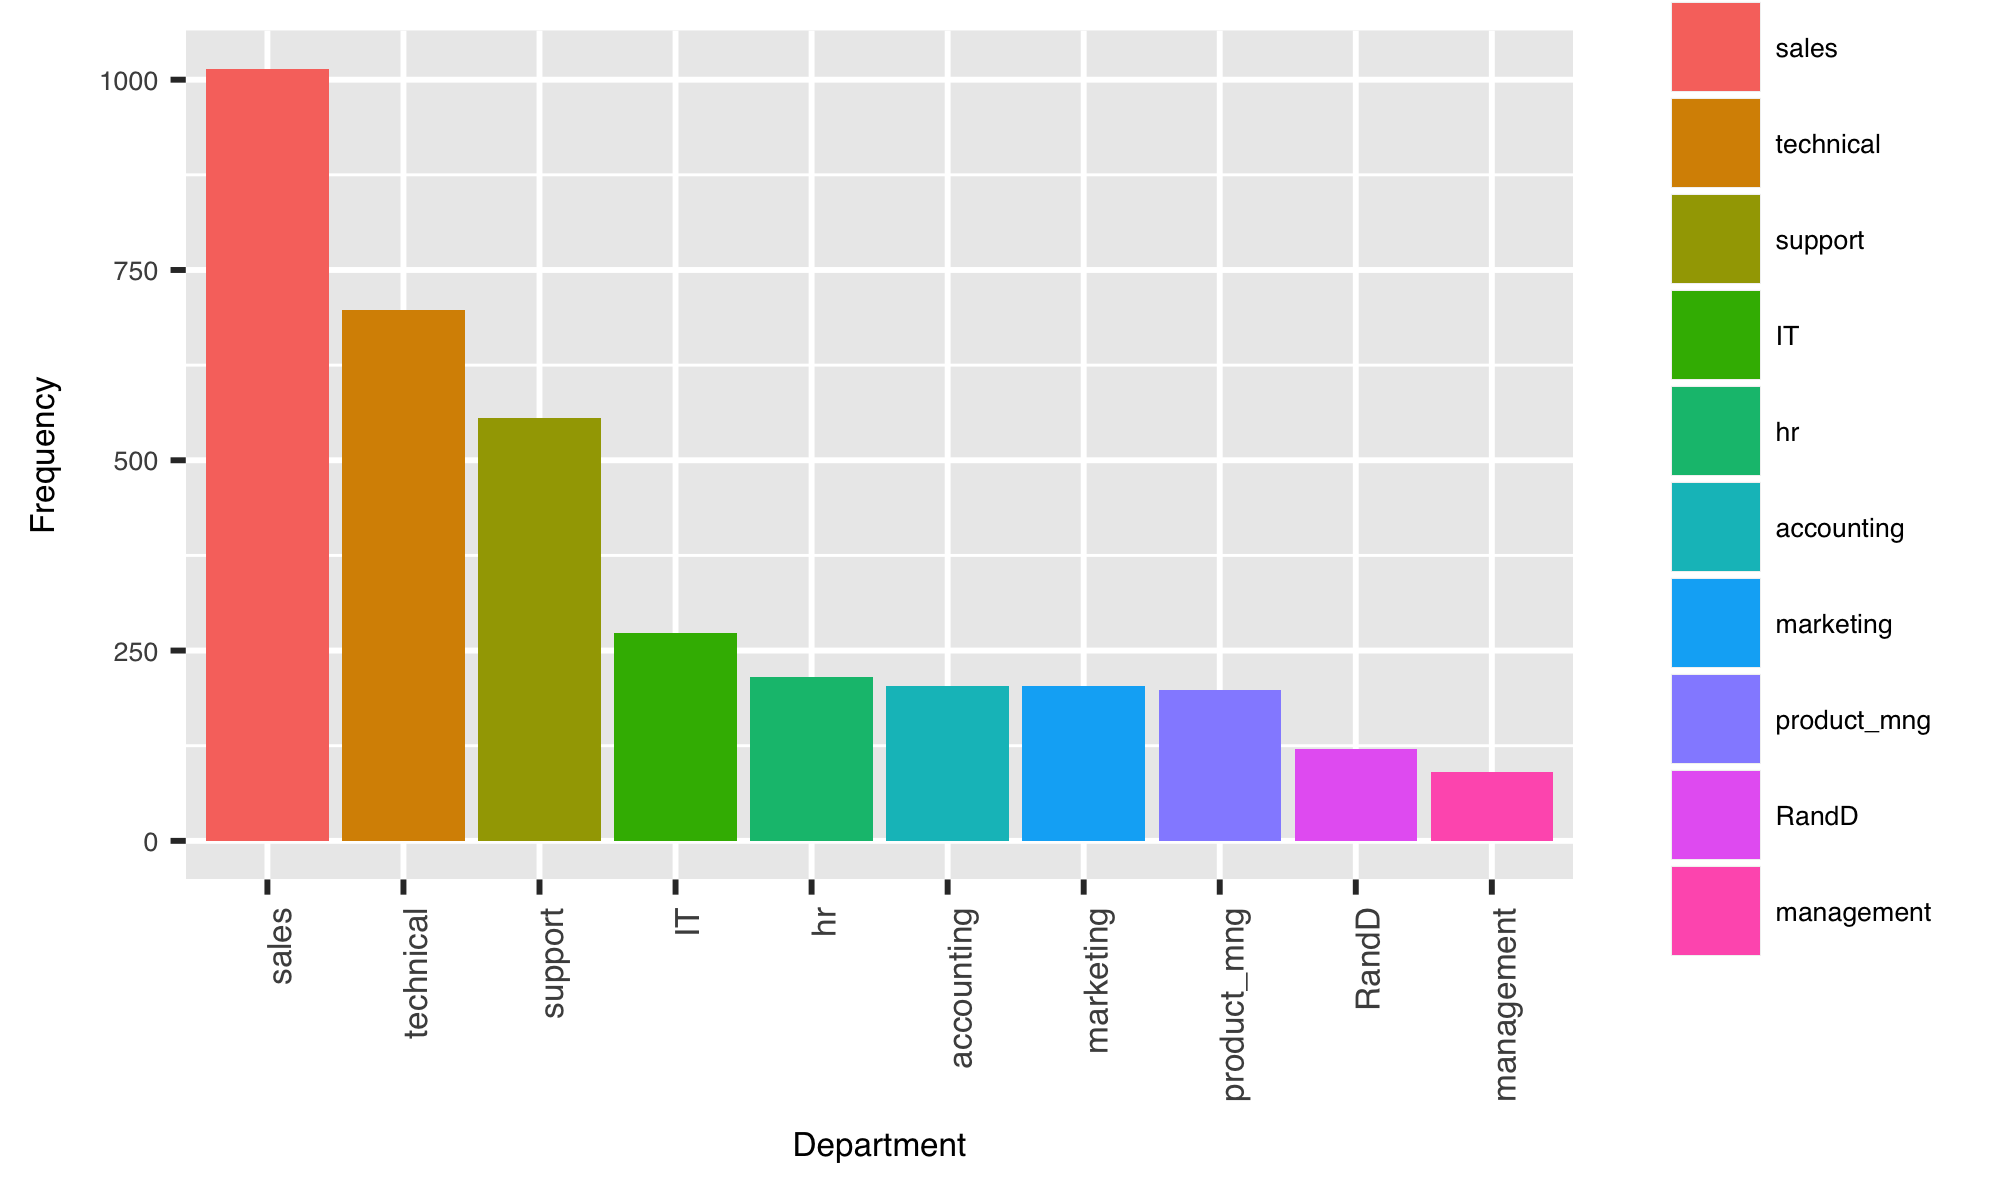

In [115]:
# Next, as a management you will also probably wonder what is the departmental staff turnover rate.
options(repr.plot.height=3)
vis_2<-table(data_set$role,data_set$left)
d_vis_2<-as.data.frame(vis_2)
d_vis_2<-subset(d_vis_2,Var2==1)
#print(d_vis_2)
library(ggplot2)
d_vis_2$Var1 <- factor(d_vis_2$Var1, levels = d_vis_2$Var1[order(-d_vis_2$Freq)])
ggplot(d_vis_2, aes(x=Var1,y=Freq,fill=Var1)) + xlab('Department') + ylab('Frequency') +
 geom_bar(stat='identity') +theme(text=element_text(size=6,  family="sans"), 
                                  axis.text.x = element_text(size=6, angle = 90, hjust = 1))


**Findings:**

- The `sales`, `technical`, and `support` department were the top 3 departments with high employee turnover.
- The `management` department had the smallest amount of turnover.
- The `hr`, `accounting`, `marketing`, `product_mng` departments have a similar turnover rate.

**Conclusion:**
- We might need more detailed information on each individual deparment (e.g. operations, benefits) to draw a conclusion

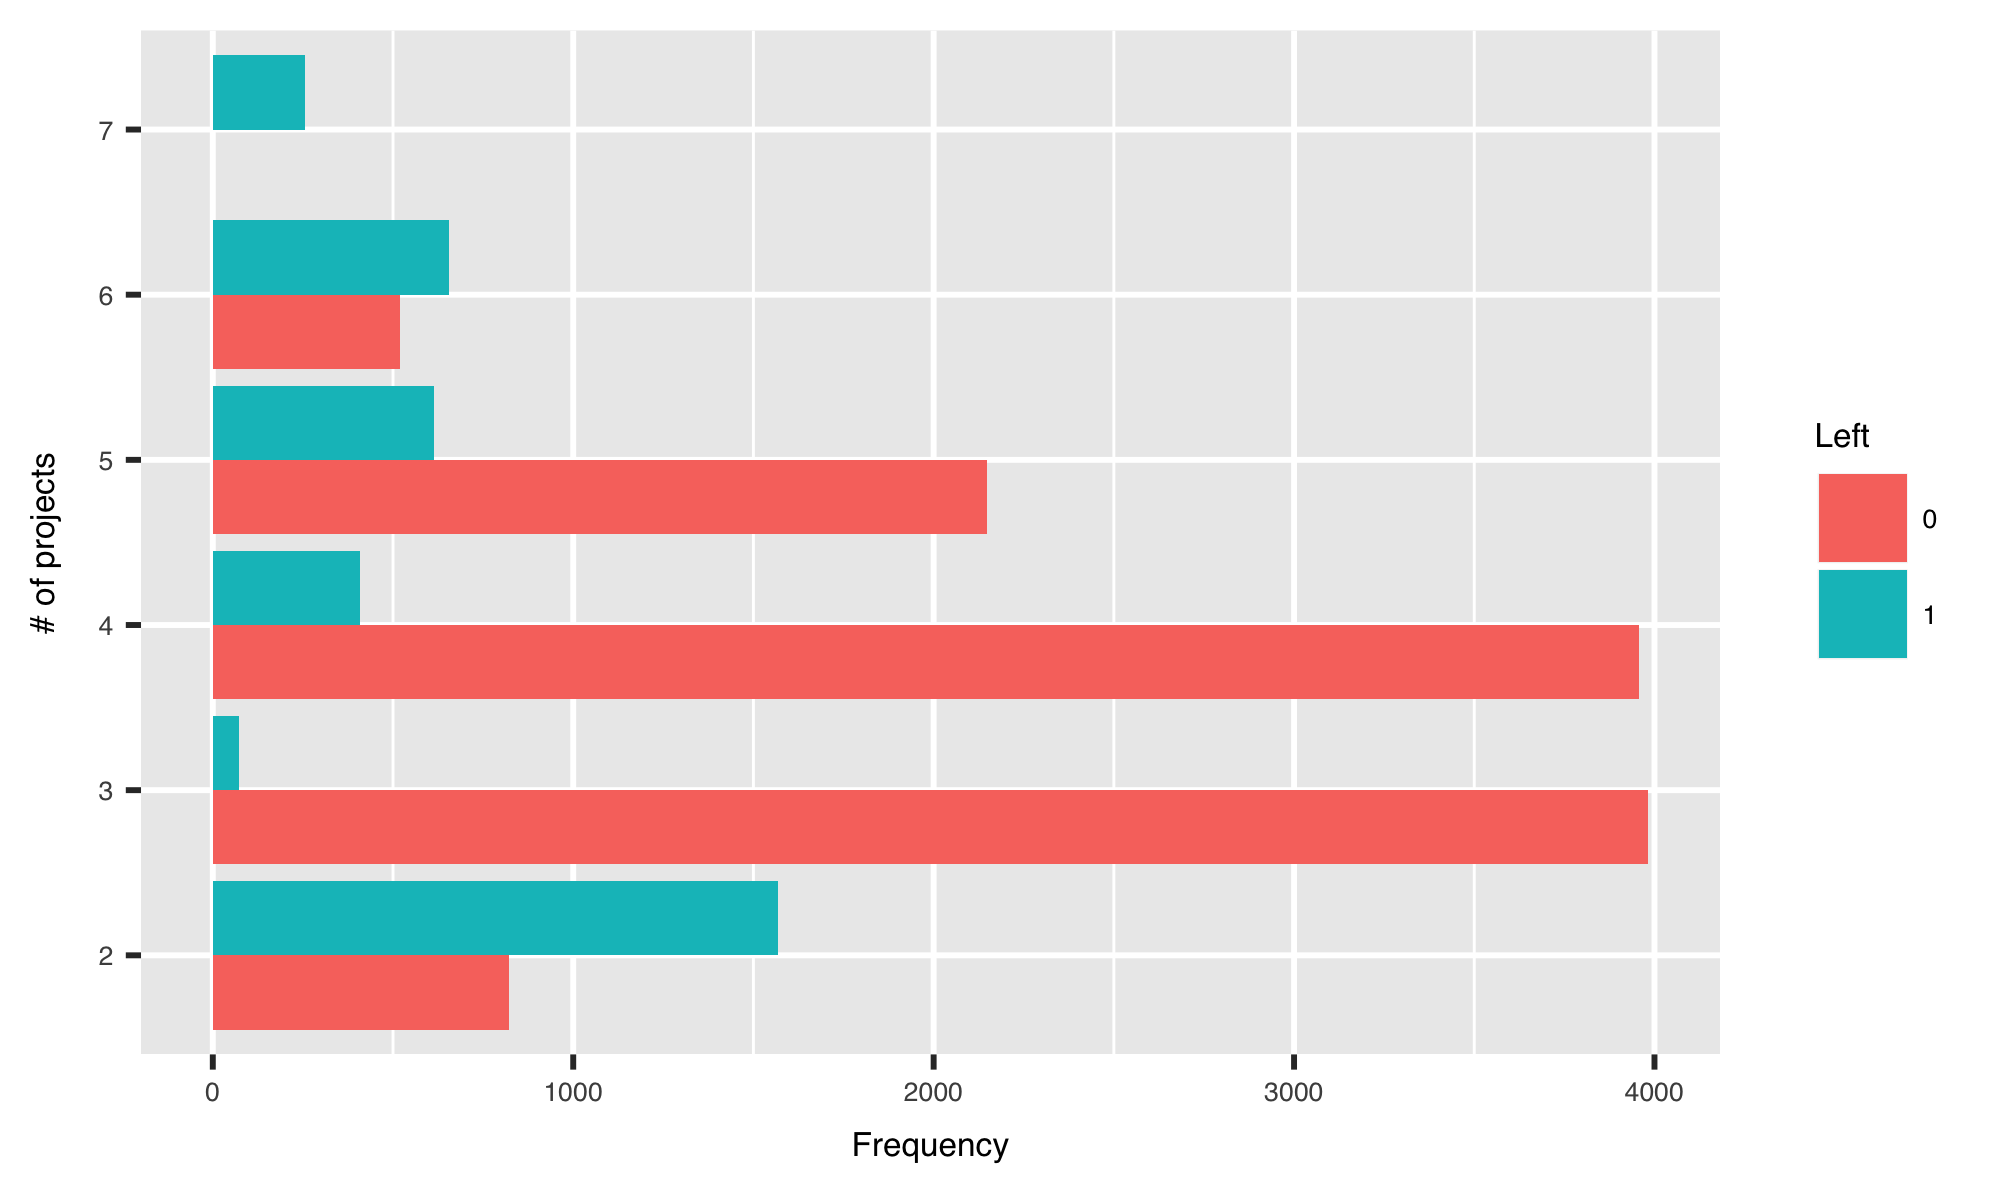

In [124]:
# Base on correlation, we also need to understand the relationship between project and the staff turnover.

vis_3<-table(data_set$number_project,data_set$left)
d_vis_3<-as.data.frame(vis_3)
#print(d_vis_1)
library(ggplot2)
ggplot(d_vis_3, aes(x=Var1,y=Freq,fill=Var2)) +
 geom_bar(position="dodge",stat='identity') + coord_flip() +
 theme(text=element_text(size=6,  family="sans")) + xlab('# of projects') + ylab('Frequency') +labs(fill="Left")


**Findings:**
- Everyone who handles 7 projects left.
- Most of the staff who handle 2 projects also left.
- Sweet spot is around 3,4,5 where more staff stay 

# Predictive Analytics for Staff Turnover

Now that we have obtained a general understanding of what is going to happened in the dataset, we would like to construct a model that help us to predict whether a staff is going to leave

In [126]:
#Creating training and test sets for the logistic regression 
smp_size <- floor(0.75 * nrow(data_set))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data_set)), size = smp_size)

train <- data_set[train_ind, ]
test <- data_set[-train_ind, ]

dim(test)
dim(train)

[1] 3750   11

[1] 11250    11

In [141]:
# Let's build a logistic regression model and use satisfaction level, last evaluation, 
# monthly working hours, salary, role, and number of project as the feature for prediction
logit_model<-glm(left~satisfaction_level+last_evaluation+average_montly_hours+salary+role+number_project,
                 data=train,binomial())


# Now we use the model that we have trained to predict.
test$logit_model<-predict(logit_model,test)

test$prediction<-ifelse(test$logit_model>=-.95,1,0)
conf_mat<-table(test$left,test$prediction)

accuracy<-(conf_mat[1,1]+conf_mat[2,2])/(conf_mat[1,1]+conf_mat[2,2]+conf_mat[1,2]+conf_mat[2,1])

print(c("Accuracy:",accuracy))

[1] "Accuracy:"         "0.763733333333333"


# Final Words

This is a simplified version of HR analytics that help us to identify key features. 

This is what we found:
1. Employees generally left when they are underworked (less than 150hr/month or 6hr/day)
2. Employees generally left when they are overworked (more than 250hr/month or 10hr/day)
3. Employees with either really high or low evaluations should be taken into consideration for high turnover rate
4. Employees with low to medium salaries are the bulk of employee turnover
5. Employees that had 2,6, or 7 project count was at risk of leaving the company
6. Employee satisfaction is the highest indicator for employee turnover.
7. Employee that had 4 and 5 years at company should be taken into consideration for high turnover rate

From the insights that we gained here, we are able to propose to management a few things:
1. Reduce working hours and number of projects to prevent staff from overworked.
2. Increase involvement so that staff get more opportunities to work on projects